# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read of the data

In [2]:
df_train = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
df_train_labels = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)
df_test = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)

In [3]:
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436


In [4]:
df_train_labels.head(3)

,0
0,1
1,0
2,0


In [5]:
df_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784


# Exploratory of the data

In [6]:
print("Shapes:")
print(f"train: {df_train.shape}")
print(f"train labels: {df_train_labels.shape}")
print(f"test: {df_test.shape}")

Shapes:
train: (1000, 40)
train labels: (1000, 1)
test: (9000, 40)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

Nulls per column

In [8]:
df_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

Mean, Standard Deviation, Minimum, Maximum, Percentiles: 25, 50, 75

In [9]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


Correlation Matrix

In [10]:
cor = df_train.corr()

<AxesSubplot: >

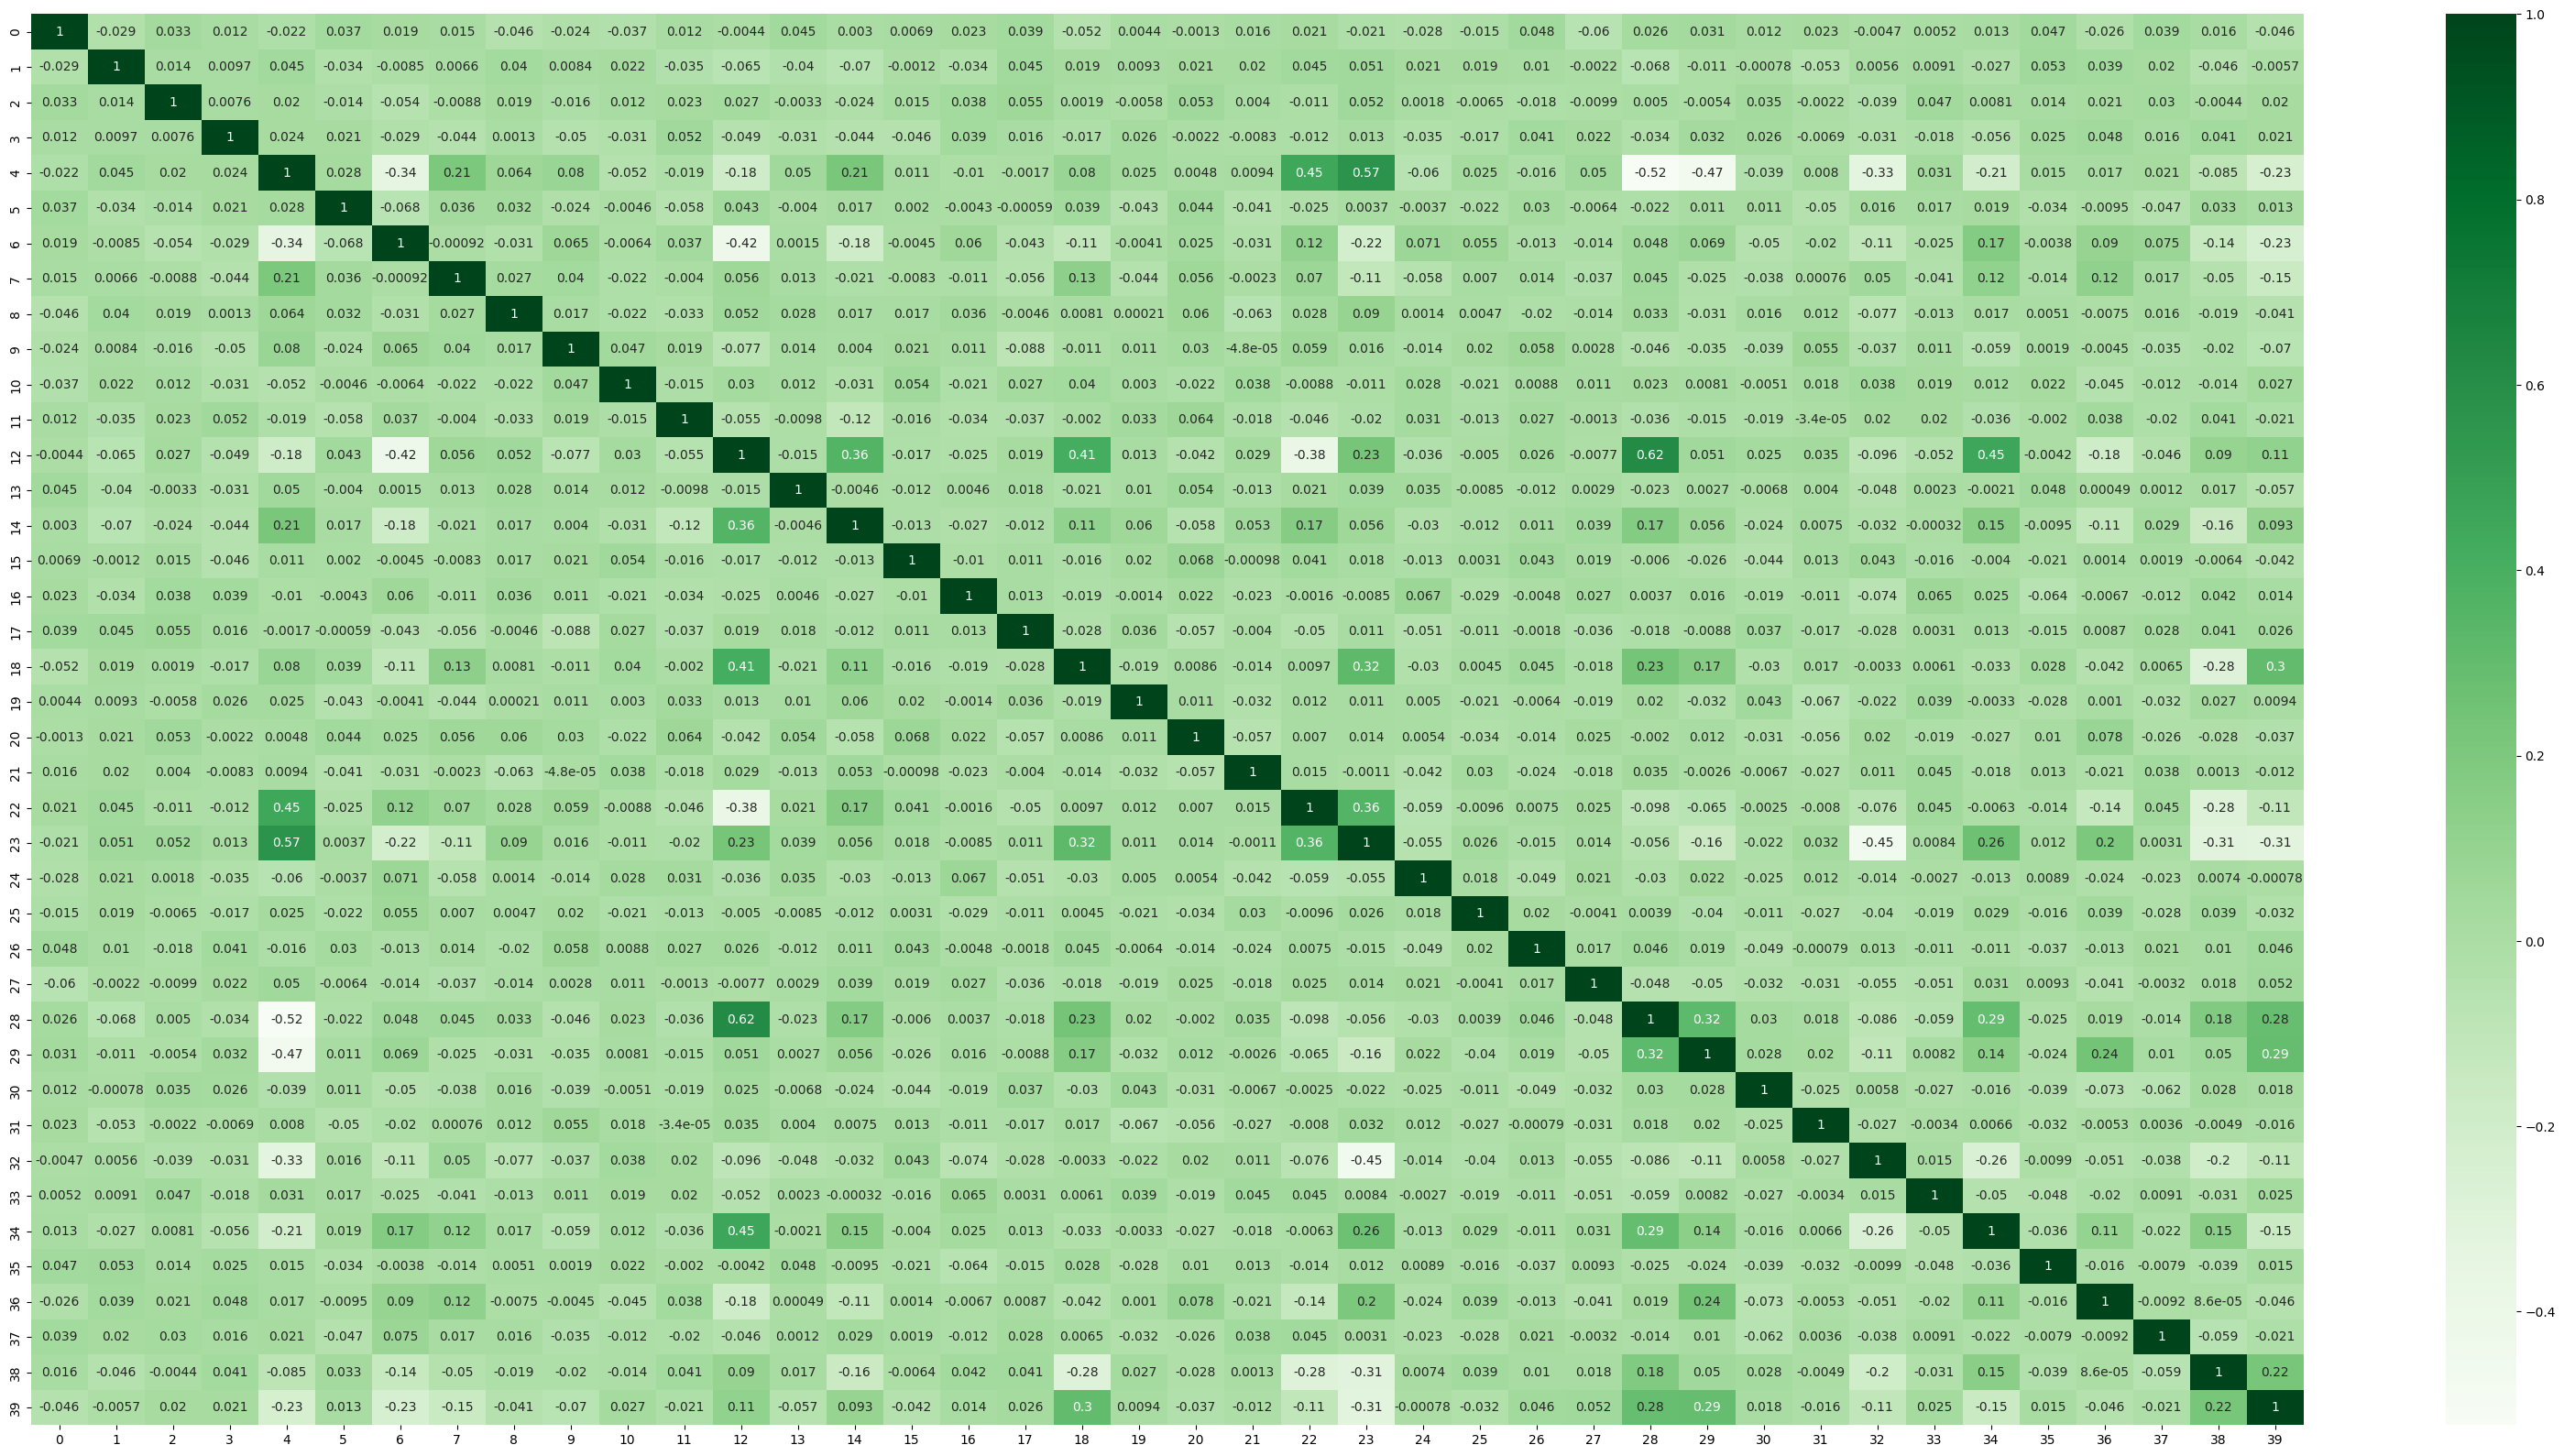

In [11]:
plt.figure(figsize=(40,20))
sns.heatmap(cor, annot=True, cmap='Greens')

# Split into Train and Test

In [12]:
X, y = df_train, np.ravel(df_train_labels)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [14]:
print(f"Features: {X_train.shape[1]}")
print(f"Target: {np.unique(y_train)}")
print(f"Rows dataset: {df_train.shape[0]}")
print("\n")
print(f"Training data ({X_train.shape[0]})")
print(f"Test data ({X_test.shape[0]})")

Features: 40
Target: [0 1]
Rows dataset: 1000


Training data (700)
Test data (300)


# Modeling

We'll use several models to be able to compare and pick the best later. 
We'll collect the results of every model to compare them later.

In [15]:
models_results = {}

## Logistic Regression

Creation of the model

In [16]:
logreg = LogisticRegression()

Hyperparameter grid

In [17]:
grid = {
    "C" :np.logspace(-3,3, 7),
    "penalty": ["l2"], # Ridge Regularization
    "solver": ["liblinear", "newton-cg"],
    "class_weight": [{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]
}

Grid search on hyper paramaters

In [18]:
logreg = GridSearchCV(logreg, grid, cv=15)

Fit the model with all the combinations of hyper parameters and using cross-fold validation.

In [19]:
logreg.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [{0: 0.95, 1: 0.05},
                                          {0: 0.55, 1: 0.45},
                                          {0: 0.45, 1: 0.55},
                                          {0: 0.05, 1: 0.95}],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg']})

Check the score on the training dataset.

In [20]:
train_score = logreg.score(X_train, y_train)
print(f"Score with training dataset: {train_score}")

Score with training dataset: 0.8257142857142857


Check the score on the test dataset.

In [21]:
test_score = logreg.score(X_test, y_test)
print(f"Score with test dataset: {test_score}")

Score with test dataset: 0.82


Check the best hyper parameters and score founds.

In [22]:
print(f"Best Hyper Parameters:\n{logreg.best_params_}")

Best Hyper Parameters:
{'C': 0.01, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'newton-cg'}


### Logistic Regression Report

In [23]:
print(f"Score with training dataset: {train_score}")
print(f"Score with test dataset: {test_score}")
print(f"Best Hyper Parameters:\n{logreg.best_params_}")

Score with training dataset: 0.8257142857142857
Score with test dataset: 0.82
Best Hyper Parameters:
{'C': 0.01, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'newton-cg'}


In [24]:
models_results['Logistic Regression'] = {
    "train score" : train_score,
    "test score" : test_score, 
    "best hyper parameters": logreg.best_params_
}

xgboost_classifier = XGBClassifier()

## XGBClassifier

Creation of the model

In [25]:
xgboost_classifier = XGBClassifier()
xgbc0 = XGBClassifier(objective='binary:logistic',
                      booster='gbtree',
                      eval_metric='auc',
                      tree_method='hist',
                      grow_policy='lossguide',
                      use_label_encoder=False)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Use a grid search with cross validation. To simplify the search of hyper parameters we'll use the default hyper parameters so the param_grid is an emtpy dictionary.

In [26]:
clf0 = GridSearchCV(
            estimator= xgbc0, 
            scoring = 'accuracy',
            param_grid = {},
            return_train_score = True, 
            verbose = 4, 
            cv = 15)

Train the model

In [27]:
clf0.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 15 folds for each of 1 candidates, totalling 15 fits
[CV 1/15] END .............., score=(train=1.000, test=0.872) total time=   0.3s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 2/15] END .............., score=(train=1.000, test=0.894) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 3/15] END .............., score=(train=1.000, test=0.872) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 4/15] END .............., score=(train=1.000, test=0.894) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 5/15] END .............., score=(train=1.000, test=0.936) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 6/15] END .............., score=(train=1.000, test=0.872) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 7/15] END .............., score=(train=1.000, test=0.872) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 8/15] END .............., score=(train=1.000, test=0.830) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 9/15] END .............., score=(train=1.000, test=0.915) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 10/15] END ............., score=(train=1.000, test=0.851) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 11/15] END ............., score=(train=1.000, test=0.935) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 12/15] END ............., score=(train=1.000, test=0.891) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 13/15] END ............., score=(train=1.000, test=0.870) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 14/15] END ............., score=(train=1.000, test=0.848) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[CV 15/15] END ............., score=(train=1.000, test=0.783) total time=   0.2s


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=15,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None,
                                     grow_policy='lossguide',
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={}, return_train_score=True, scoring='accuracy',
             verbose=4)

Check score on the training dataset

In [28]:
train_score = clf0.score(X_train, y_train)

Check the score in the test dataset

In [29]:
test_score = clf0.score(X_test, y_test)

### XGBClassifier Report

In [30]:
print(f"Score with training dataset: {train_score}")
print(f"Score with test dataset: {test_score}")

Score with training dataset: 1.0
Score with test dataset: 0.8633333333333333


In [31]:
models_results['XGBClassifier'] = {
    "train score" : train_score,
    "test score" : test_score
}

## RandomForestClassifier

In [32]:
random_forest_classifier = RandomForestClassifier(random_state = 42)

In [33]:
random_forest_hyper_parameters_grid = {
    'n_estimators' : [200], 
    'max_features' : ['sqrt'],
    'max_depth' : [4, 5],
    'criterion' : ['gini']
}

In [34]:
cv_random_forest_classifier = GridSearchCV(
                                    estimator = random_forest_classifier, 
                                    param_grid = random_forest_hyper_parameters_grid,
                                    cv = 15)

In [35]:
cv_random_forest_classifier.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5],
                         'max_features': ['sqrt'], 'n_estimators': [200]})

In [36]:
train_score = cv_random_forest_classifier.score(X_train, y_train)

In [37]:
test_score = cv_random_forest_classifier.score(X_test, y_test)

In [38]:
models_results['Random Forest Classifier'] = {
    "train score" : train_score,
    "test score" : test_score
}

In [39]:
models_results['Random Forest Classifier']

{'train score': 0.9342857142857143, 'test score': 0.8333333333333334}

## Ridge Classifier

In [40]:
hyper_parameters_grid = {
    'alpha': [1, 10]
}

ridge_classifier = RidgeClassifier()

cv_ridge_classifier = GridSearchCV(ridge_classifier, 
                                   hyper_parameters_grid,
                                   cv = 15)

In [41]:
cv_ridge_classifier.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=RidgeClassifier(), param_grid={'alpha': [1, 10]})

In [42]:
train_score = cv_ridge_classifier.score(X_train, y_train)

In [43]:
test_score = cv_ridge_classifier.score(X_test, y_test)

In [44]:
cv_ridge_classifier.best_params_

{'alpha': 10}

In [45]:
models_results['Ridge Classifier'] = {
    "train score" : train_score,
    "test score" : test_score, 
    "best hyper parameters": cv_ridge_classifier.best_params_
}
models_results

{'Logistic Regression': {'train score': 0.8257142857142857,
  'test score': 0.82,
  'best hyper parameters': {'C': 0.01,
   'class_weight': {0: 0.45, 1: 0.55},
   'penalty': 'l2',
   'solver': 'newton-cg'}},
 'XGBClassifier': {'train score': 1.0, 'test score': 0.8633333333333333},
 'Random Forest Classifier': {'train score': 0.9342857142857143,
  'test score': 0.8333333333333334},
 'Ridge Classifier': {'train score': 0.8342857142857143,
  'test score': 0.83,
  'best hyper parameters': {'alpha': 10}}}

## KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()
k_range = list(range(1,31))
hyper_parameters_grid = dict(n_neighbors=k_range)

cv_kneighbors_classifier = GridSearchCV(knn, 
                                       param_grid = hyper_parameters_grid,
                                       cv = 10, 
                                       scoring='accuracy',
                                       return_train_score=False, 
                                       verbose=1)

In [47]:
cv_kneighbors_classifier.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [48]:
train_score = cv_kneighbors_classifier.score(X_train, y_train)

In [49]:
test_score = cv_kneighbors_classifier.score(X_test, y_test)

In [50]:
cv_kneighbors_classifier.best_params_

{'n_neighbors': 8}

In [51]:
models_results['KNeighbors Classifier'] = {
    "train score" : train_score,
    "test score" : test_score, 
    "best hyper parameters": cv_kneighbors_classifier.best_params_
}
models_results

{'Logistic Regression': {'train score': 0.8257142857142857,
  'test score': 0.82,
  'best hyper parameters': {'C': 0.01,
   'class_weight': {0: 0.45, 1: 0.55},
   'penalty': 'l2',
   'solver': 'newton-cg'}},
 'XGBClassifier': {'train score': 1.0, 'test score': 0.8633333333333333},
 'Random Forest Classifier': {'train score': 0.9342857142857143,
  'test score': 0.8333333333333334},
 'Ridge Classifier': {'train score': 0.8342857142857143,
  'test score': 0.83,
  'best hyper parameters': {'alpha': 10}},
 'KNeighbors Classifier': {'train score': 0.9371428571428572,
  'test score': 0.8966666666666666,
  'best hyper parameters': {'n_neighbors': 8}}}

## Conclusion

In order to compare the models, we are going to print the results for each one.

In [52]:
for model_name, model_metrics in models_results.items():
    print(model_name)
    for k, v in model_metrics.items():
        print(f"  - {k} => {v}")
    print("\n")

Logistic Regression
  - train score => 0.8257142857142857
  - test score => 0.82
  - best hyper parameters => {'C': 0.01, 'class_weight': {0: 0.45, 1: 0.55}, 'penalty': 'l2', 'solver': 'newton-cg'}


XGBClassifier
  - train score => 1.0
  - test score => 0.8633333333333333


Random Forest Classifier
  - train score => 0.9342857142857143
  - test score => 0.8333333333333334


Ridge Classifier
  - train score => 0.8342857142857143
  - test score => 0.83
  - best hyper parameters => {'alpha': 10}


KNeighbors Classifier
  - train score => 0.9371428571428572
  - test score => 0.8966666666666666
  - best hyper parameters => {'n_neighbors': 8}




As we can see __KNeighbors Classifier is the model that got the best metrics for the testing dataset__

To submit the result to the competition, we need to write a csv with the results. We can first transform the results to a pandas dataframe and then save it to csv.

In [53]:
model_names = []
train_scores = []
test_scores = []

for model_name, model_metrics in models_results.items():
    model_names.append(model_name)
    train_scores.append(models_results[model_name]['train score'])
    test_scores.append(models_results[model_name]['test score'])
    
print(model_names)
print(train_scores)
print(test_scores)

['Logistic Regression', 'XGBClassifier', 'Random Forest Classifier', 'Ridge Classifier', 'KNeighbors Classifier']
[0.8257142857142857, 1.0, 0.9342857142857143, 0.8342857142857143, 0.9371428571428572]
[0.82, 0.8633333333333333, 0.8333333333333334, 0.83, 0.8966666666666666]


In [54]:
df_metrics = pd.DataFrame(list(zip(model_names, train_scores, test_scores)),
               columns =['model_name', 'train_score', 'test_score'])

In [55]:
df_metrics

,model_name,train_score,test_score
0,Logistic Regression,0.825714,0.820000
1,XGBClassifier,1.000000,0.863333
2,Random Forest Classifier,0.934286,0.833333
3,Ridge Classifier,0.834286,0.830000
4,KNeighbors Classifier,0.937143,0.896667


Predicted values using the best model for the test set proposed by kaggle

In [56]:
submission = cv_kneighbors_classifier.predict(df_test)

In [57]:
print("Predicted submission")
submission

Predicted submission


array([1, 0, 1, ..., 1, 0, 1])

In [58]:
df_submission = pd.DataFrame(submission)

In [59]:
df_submission.columns = ['Solution']

In [60]:
df_submission

,Solution
0,1
1,0
2,1
3,0
4,0
...,...
8995,1
8996,1
8997,1
8998,0


In [61]:
# Create a column with an id array autoincremental
df_submission['Id'] = np.arange(1, df_submission.shape[0] + 1)

In [62]:
# Reorder columns 
df_submission = df_submission[['Id', 'Solution']]

In [63]:
df_submission

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
8995,8996,1
8996,8997,1
8997,8998,1
8998,8999,0


In [64]:
# Save as a csv that will be send to kaggle
df_submission.to_csv('submission.csv', index=False)